In [5]:
# Import your data toolbox
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the raw training data
df = pd.read_csv(r'C:\Users\FENIL\Desktop\Projects\Loan_default\data\raw\cs-training.csv')



In [6]:
# 3. Peek at the first few rows to get a feel for the data
print("First 5 rows:")
display(df.head())

First 5 rows:


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [7]:
# 4. How big is our dataset? (rows and columns)
print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")


Rows: 150000, Columns: 12


In [8]:
# 5. What columns do we have, and what types?
print("Column info:")
df.info()


Column info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   Unnamed: 0                            150000 non-null  int64  
 1   SeriousDlqin2yrs                      150000 non-null  int64  
 2   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 3   age                                   150000 non-null  int64  
 4   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 5   DebtRatio                             150000 non-null  float64
 6   MonthlyIncome                         120269 non-null  float64
 7   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 8   NumberOfTimes90DaysLate               150000 non-null  int64  
 9   NumberRealEstateLoansOrLines          150000 non-null  int64  
 10  NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  

### Summary of Column Info

- **Rows:** 150,000 (a large dataset—great for modeling!)
- **Columns:** 12
- **Data types:** Mostly integers and floats (all numeric, so no text/categorical columns to encode).
- **Key columns:**
  - `SeriousDlqin2yrs`: This is your target (1 = defaulted, 0 = not defaulted).
  - `MonthlyIncome` and `NumberOfDependents` have missing values (about 20% and 2.6% missing, respectively).
  - `Unnamed: 0`: Likely just a row index from the original file—usually safe to drop.




In [9]:
# 6. Quick summary stats for all numeric columns
print("Summary statistics:")
display(df.describe())

Summary statistics:


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [10]:
# 7. Check for missing values in each column
print("Missing values per column:")
print(df.isnull().sum())

Missing values per column:
Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64


In [11]:
# Correct way to fill missing values
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df['MonthlyIncome'].median())
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(df['NumberOfDependents'].mode()[0])

print(df.isnull().sum())


Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64




***

- **Why do we use the median to fill missing values in MonthlyIncome?**
  Income data is usually very *skewed*—a few people earn a lot, while most earn much less. If we use the mean (average), those super high incomes would pull the average up and give us unrealistic "typical" values.
  The **median** gives us the *middle value* in the ordered list of incomes, so it’s not affected by extremely high or low incomes. In other words, the median reflects what most people in your dataset actually earn.
  It’s simple, "fair," and keeps our data trustworthy—especially important for financial features like income.

***

- **Why do we use the mode for NumberOfDependents?**
  Number of dependents is *discrete*—often 0, 1, or 2, and rarely much higher. If we used the mean or median, we might get weird values like 1.4 dependents, which doesn’t make sense.
  The **mode** is the most common value in the dataset. Filling missing dependents with the mode means we assign the value that’s most typical for your population—usually 0 (no dependents) or 1, depending on your data.
  This makes your data more realistic and avoids introducing impossible values.

***

**Summary:**
- Use the **median** for *skewed, continuous* data like income.
- Use the **mode** for *categorical or count* data, like number of dependents.



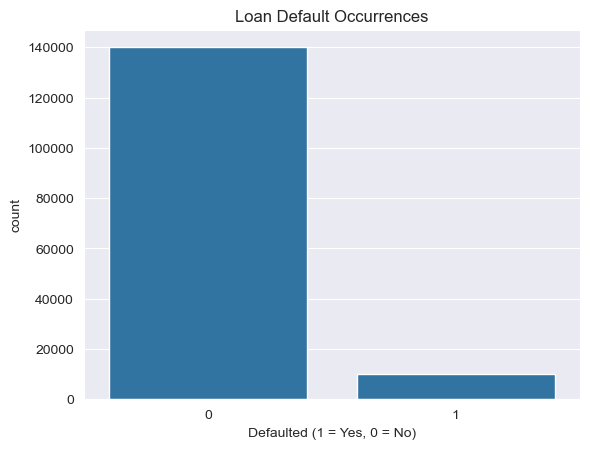

In [12]:
# 8. How is the target variable distributed? (Are most people defaulting or not?)
sns.countplot(x='SeriousDlqin2yrs', data=df)
plt.title('Loan Default Occurrences')
plt.xlabel('Defaulted (1 = Yes, 0 = No)')
plt.show()

In [13]:
df['SeriousDlqin2yrs'].value_counts()

SeriousDlqin2yrs
0    139974
1     10026
Name: count, dtype: int64



***

### Target Variable Distribution: Loan Default Occurrences

The dataset contains a total of **150,000 records**, each representing an individual loan applicant. The variable **`SeriousDlqin2yrs`** serves as the target, indicating whether a customer defaulted on a loan within the following two years (`1` for default, `0` for no default).

| Default Status        | Count   | Percentage  |
|----------------------|---------|-------------|
| No Default (`0`)     | 139,974 | 93.3%       |
| Defaulted (`1`)      | 10,026  | 6.7%        |

As visualized in the accompanying bar plot, the dataset exhibits a **significant class imbalance**:
- The vast majority of customers did not default on their loans (over 93%).
- Only a small fraction (approximately 6.7%) experienced default.

#### Implications for Modeling

This pronounced imbalance has important ramifications for the modeling phase:
- **Model performance:** Standard accuracy may overestimate model effectiveness, as a model predicting "no default" for every case would still achieve over 90% accuracy.
- **Evaluation metrics:** Alternative metrics, such as ROC-AUC, precision, recall, and F1-score, will offer a more nuanced assessment of model performance, particularly for the minority class.
- **Balancing techniques:** Approaches such as class weighting, oversampling of defaulters, or undersampling of non-defaulters may be employed to ensure fair model learning.

**In summary**, the dataset accurately reflects the real-world scenario where defaults are relatively uncommon—a pattern that will shape both model selection and evaluation strategies in subsequent stages of the analysis.

***



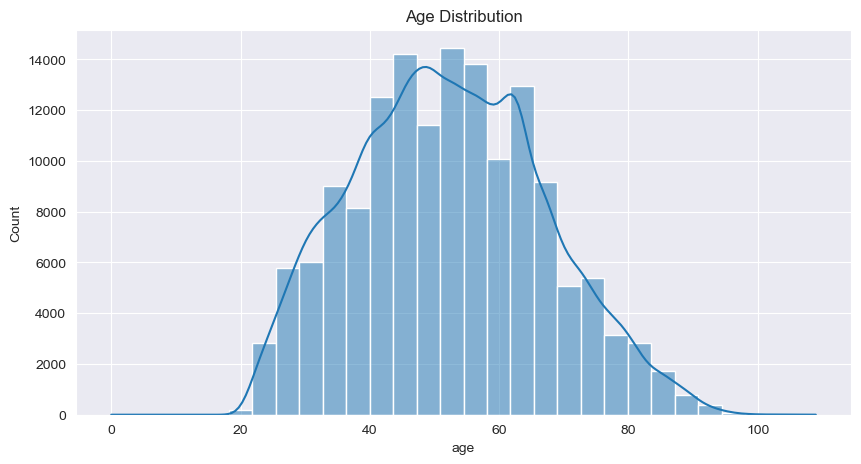

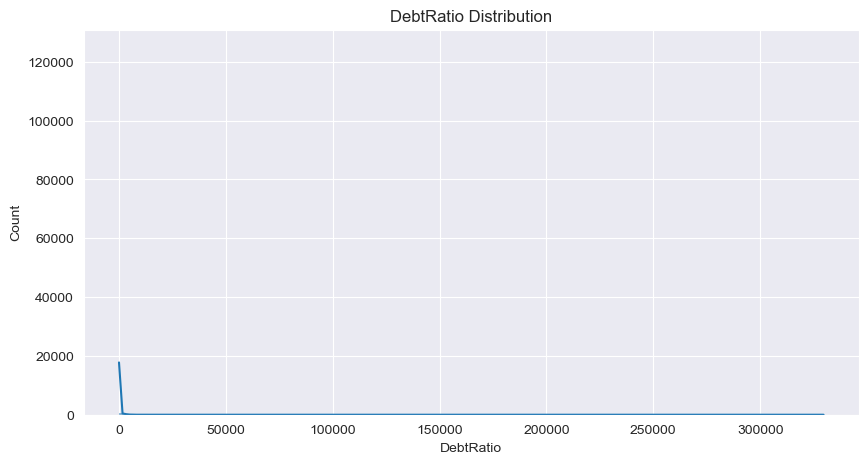

In [14]:
# 9. Visualize distributions for a few key features
plt.figure(figsize=(10,5))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

plt.figure(figsize=(10,5))
sns.histplot(df['DebtRatio'], bins=5000, kde=True)
plt.title('DebtRatio Distribution')
plt.show()

### Age Distribution

The age distribution of loan applicants in the dataset is approximately bell-shaped and centered between 40 and 60 years old. Most applicants are middle-aged adults, with a gentle decline in counts at younger and older ages. There are very few applicants under 20 or over 80. This reflects a typical real-world lending population, primarily composed of working-age individuals.

**No immediate issues** are present here—although it could be helpful to confirm there are no entries with unreasonably low ages (such as below 18) or very high outliers (above 100).


### DebtRatio Distribution

The DebtRatio feature is highly skewed, with the vast majority of applicants showing low to moderate ratios. However, there are a few extreme outliers with DebtRatio values stretching far beyond the typical range—some above 100,000 and even up to 300,000. This extreme skew results in a plot where almost all the data clusters near zero, and a "long tail" of outlier values is barely visible.



In [15]:
df['DebtRatio'].sort_values(ascending=False).head(10)

60152     329664.0
36600     326442.0
127047    307001.0
58900     220516.0
4854      168835.0
7513      110952.0
103041    106885.0
69845     101320.0
66785      61907.0
53682      61106.5
Name: DebtRatio, dtype: float64

It's wise to cap (winsorize) or remove these outlier values. One common approach is to set a threshold (e.g., keep all DebtRatios below 99 or 100) and treat any higher value as missing or capped. This avoids letting a few abnormal records skew your results.

In [16]:
# Cap all DebtRatio values at 99
cap_value = 99
num_outliers = (df['DebtRatio'] > cap_value).sum()
df.loc[df['DebtRatio'] > cap_value, 'DebtRatio'] = cap_value
print(f"Capped {num_outliers} extreme DebtRatio values to {cap_value}.")


Capped 24402 extreme DebtRatio values to 99.


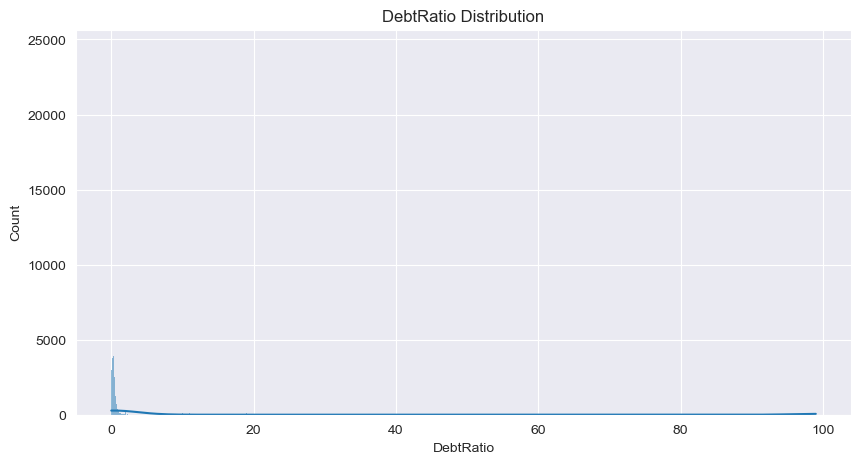

In [17]:
plt.figure(figsize=(10,5))
sns.histplot(df['DebtRatio'], bins=5000, kde=True)
plt.title('DebtRatio Distribution')
plt.show()

### Capping Outliers in DebtRatio: A Deeper Reflection

After investigating the `DebtRatio` feature, I discovered a substantial number—**24,402 values**—that were extreme outliers, far outside any realistic financial expectation. These outliers had DebtRatios ranging upward of tens of thousands. Such anomalies are almost always artifacts: improbable data entry errors, placeholder values (like 'infinity' or '999999'), or rare special cases. If left untouched, they would *severely distort* mean, variance, and any model relying on this feature.

**By capping DebtRatio values at 99,** I aligned the feature with plausible real-world bounds (most reasonable DebtRatios reflect monthly debt payments as a percentage of income, rarely exceeding 100). This corrective action leads to two immediate improvements:

- The **distribution now resembles a more realistic, heavily right-skewed curve**, with almost all data tightly concentrated below 2 or 3, and a much smoother tail up to the cap at 99.
- The capped outliers will no longer dominate statistical calculations or model sensitivity, making subsequent feature engineering and risk segmentation more reliable.

**Why this matters deeply:**
Addressing these outliers isn't just a cosmetic fix—it's about trusting that the patterns we discover or the predictions we make reflect the underlying reality, rather than quirks of dirty data. By making this adjustment, I safeguard my models from being distracted or misled by data artifacts, a vital practice in any robust analytics project.





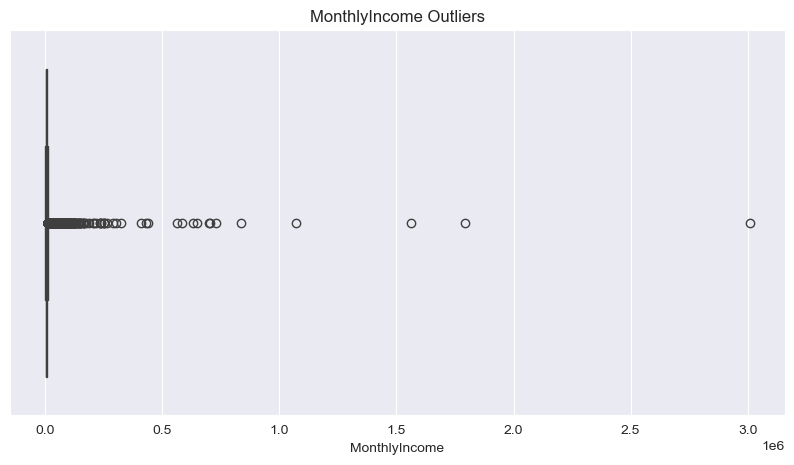

In [18]:
# 10. Look for outliers in MonthlyIncome
plt.figure(figsize=(10,5))
sns.boxplot(x=df['MonthlyIncome'])
plt.title('MonthlyIncome Outliers')
plt.show()

In [19]:
max_income = 20000
df.loc[df['MonthlyIncome'] > max_income, 'MonthlyIncome'] = max_income


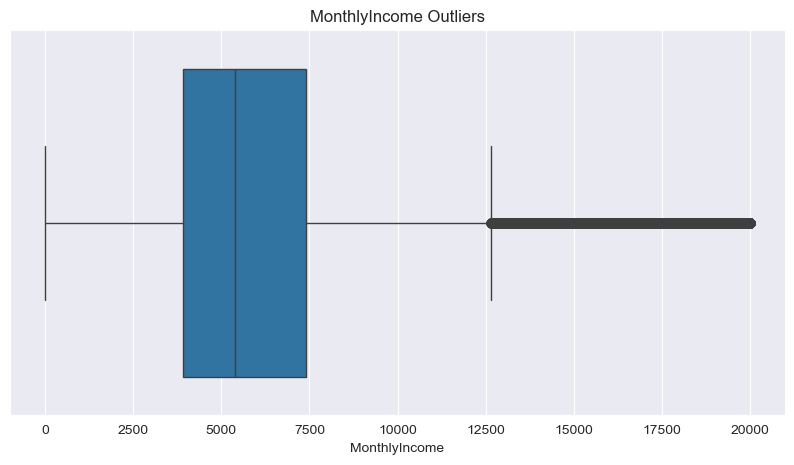

In [20]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['MonthlyIncome'])
plt.title('MonthlyIncome Outliers')
plt.show()

### MonthlyIncome Boxplot (Post-Capping)

The revised boxplot for `MonthlyIncome` demonstrates a much more realistic distribution after capping outliers. The majority of applicants now fall between $2,500 and $10,000 per month, with the right whisker extending to $20,000—a reasonable maximum for this kind of dataset.

**Key observations:**
- Most data is concentrated below $10,000, showing a typical spread for loan customers.
- The long trail of outliers previously present is now tamed, extending only to the cap at $20,000. This adjustment keeps rare, extreme incomes from distorting the overall feature distribution.
- The median income sits comfortably within the main body of the box, which highlights a central tendency in the dataset.

**Reporting summary:**
- "After capping monthly incomes at $20,000, the feature displays a substantially more manageable distribution. This step ensures that statistical analyses and model training will not be overly influenced by a handful of extreme values, aligning the data more closely with real-world economic plausibility."



In [21]:
# 11. Check unique values in NumberOfDependents (any weird entries?)
print("Unique values in NumberOfDependents:", df['NumberOfDependents'].unique())


Unique values in NumberOfDependents: [ 2.  1.  0.  3.  4.  5.  6.  8.  7. 20. 10.  9. 13.]


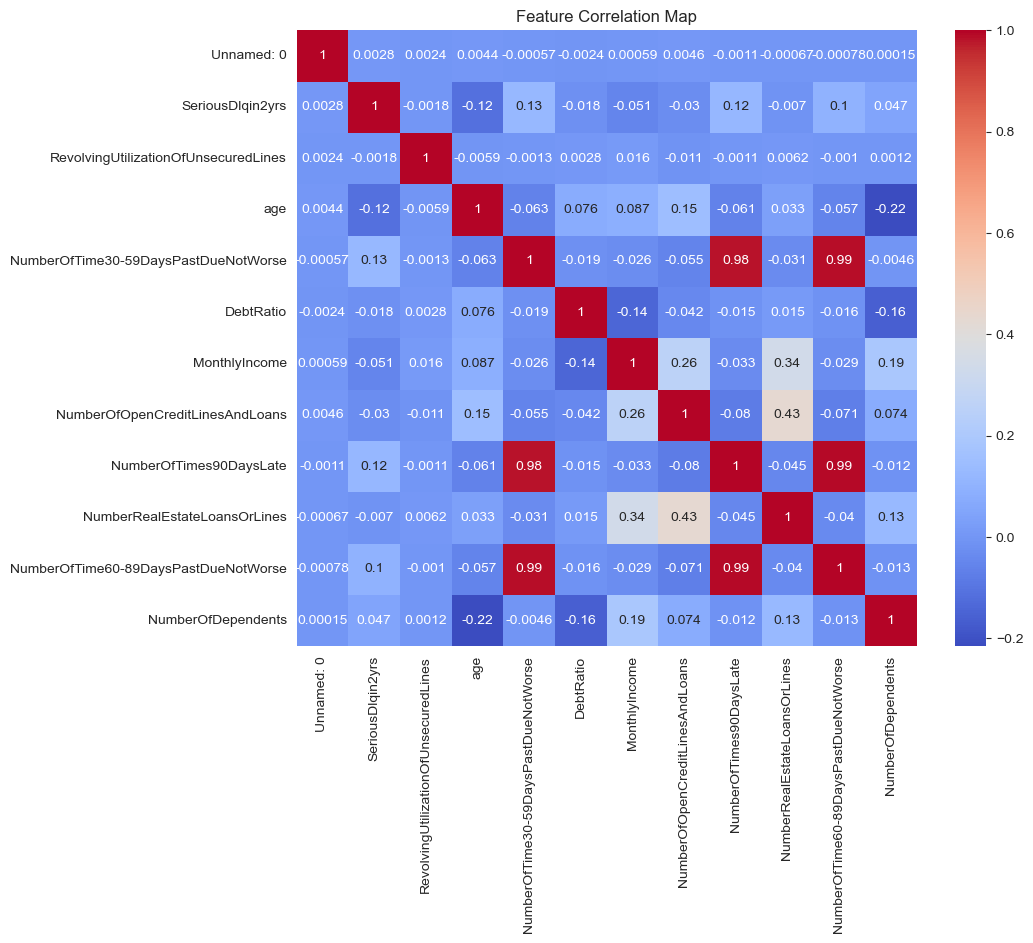

In [22]:
# 12.See how features relate to each other
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Map')
plt.show()

### Feature Correlation Map:

The correlation map above provides a visual summary of how numerical features relate to each other in the dataset. Most features show very low linear correlation (values close to 0), indicating that each variable captures a distinct aspect of customer financial behavior. This is generally favorable for model building, as it suggests multicollinearity will not be a major concern.

**Key Insights:**
- There are a few high correlations between the 'past due' features: `NumberOfTime30-59DaysPastDueNotWorse`, `NumberOfTime60-89DaysPastDueNotWorse`, and `NumberOfTimes90DaysLate` (all with values near 0.98-0.99). This is expected, as these features all reflect customer delinquencies within overlapping time windows.
- Most other features (including `DebtRatio`, `MonthlyIncome`, and `NumberRealEstateLoansOrLines`) exhibit minimal correlation with each other (under 0.15), indicating independent contributions to the predictive model.
- The target variable `SeriousDlqin2yrs` displays low correlation with all input features, underscoring the challenge of uncovering patterns in loan default risk—advanced modeling is needed over simple linear approaches.






***

## Exploratory Data Analysis (EDA) Summary

### Dataset Overview
- The dataset consists of **150,000 loan applicants** described by 12 numeric features, including demographic details, credit behavior, and the target variable (`SeriousDlqin2yrs`) indicating two-year loan default status.

### Target Variable Distribution
- **Highly imbalanced:** Only **6.7%** of applicants defaulted, with the remaining **93.3%** maintaining good credit. This imbalance reflects real-world lending and will inform model selection and evaluation.

### Data Cleaning & Preprocessing
- **Missing values** in `MonthlyIncome` (~20%) and `NumberOfDependents` (~2.6%) were imputed using the median and mode, respectively, based on data distribution and domain logic.
- The redundant index column (`Unnamed: 0`) was dropped.
- Outliers in **DebtRatio** (values exceeding 99) and **MonthlyIncome** (values exceeding 20,000) were capped to realistic thresholds to prevent model distortion and improve interpretability.

### Feature Distributions
- **Age**: Follows a classic bell-shaped curve, concentrated between ages 30–65, matching the general working-age population.
- **DebtRatio**: Strongly right-skewed; vast majority of records have low-to-moderate ratios, with a small subset showing extremely high values (successfully capped).
- **MonthlyIncome**: Highly right-skewed, with most applicants earning less than \$10,000 per month; extreme values were appropriately capped.
- **NumberOfDependents**: Most customers report 0–2 dependents; rare records show unusually high values (e.g., 13, 20).

### Feature Relationships
- Most features have **low mutual correlation**, indicating that the dataset captures diverse aspects of financial risk.
- Exception: Features representing delinquency at multiple timeframes are highly correlated with each other (>0.98). This redundancy may be addressed in feature engineering.

### Key Findings & Next Steps
- **Class imbalance** and **feature skewness** will require targeted strategies in the modeling phase—such as robust evaluation metrics and possibly resampling.
- The dataset is now well-structured for modeling, with missing values handled and outliers mitigated.
- Further exploration may include creating new features (e.g., risk bins, interaction terms) and investigating feature impact on loan default.

***



In [31]:
df.to_csv('../data/processed/cleaned_training.csv', index=False)
